In [240]:
# import library
import pandas as pd
import seaborn as sns
import sklearn.model_selection as ms
import sklearn.naive_bayes as nb
import sklearn.metrics as met

In [223]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv')
df = df.copy()
# tampilkan 5 data teratas
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [224]:
# cek tipe data
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

In [225]:
# lihat jumlah baris dan kolom
df.shape

(244, 14)

In [226]:
# melihat statistik data
df.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fire
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,NaN
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,NaN
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,NaN
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,NaN
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,NaN


In [227]:
# ubah nilai Classes ke dalam 0 dan 1 agar dapat dibaca oleh Scikit-Learn
classes = {"Classes": {"not fire": 0, "fire": 1}}
df.replace(classes, inplace=True)

In [228]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
dtype: object

<AxesSubplot:>

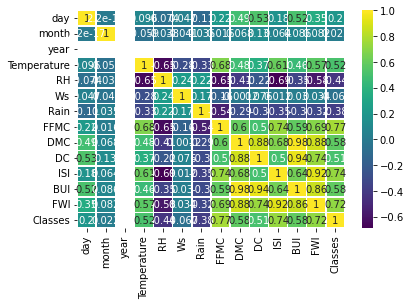

In [229]:
# melihat korelasi antar variabel
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidths=0.5)

In [230]:
# drop atribut year karena tidak memiliki korelas
df = df.drop(['year'], axis=1)

In [231]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [233]:
df['Rain'] = df['Rain'].astype(int)
df['FFMC'] = df['FFMC'].astype(int)
df['DMC'] = df['DMC'].astype(int)
df['DC'] = df['DC'].astype(int)
df['ISI'] = df['ISI'].astype(int)
df['BUI'] = df['BUI'].astype(int)
df['FWI'] = df['FWI'].astype(int)

<AxesSubplot:>

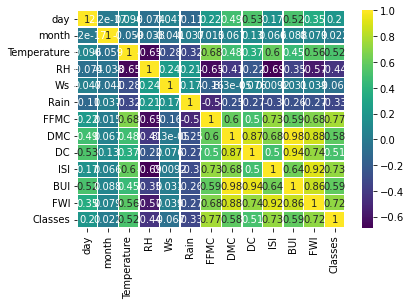

In [235]:
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidths=0.5)

In [239]:
# pecah data menjadi training dan testing
features = df[['day', 'month', 'Temperature', 'RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
label = df['Classes']
X_train, X_test, y_train, y_test = ms.train_test_split(features, label, test_size=0.2, random_state=0)

In [241]:
gnb = nb.GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [250]:
y_prediksi = gnb.predict(X_test)
accuracy = met.accuracy_score(y_test, y_prediksi)
precision = met.precision_score(y_test, y_prediksi)

persen_accuracy = accuracy * 100

print("Visualisasi training error curve dengan training test = 80% dan testing test = 20%")
print("Accuracy:", persen_accuracy,"%,", "Precision:", precision)

Visualisasi training error curve dengan training test = 80% dan testing test = 20%
Accuracy: 89.79591836734694 %, Precision: 0.9615384615384616
